#Problem Statement

Dream Housing Fonance company deals in all home loans. They have presence across all urban, semi urban, and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Matrial Status, Education, Number of Dependents, Income, Loan Amount, Credit Histody and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

#Import Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Dataset

In [192]:
data_train = '/content/drive/MyDrive/Data/Classification Case/Loan Prediction/train_loan.csv'
data_test = '/content/drive/MyDrive/Data/Classification Case/Loan Prediction/test_loan.csv'
data_sample = '/content/drive/MyDrive/Data/Classification Case/Loan Prediction/sample_result_loan.csv'

In [193]:
train = pd.read_csv(data_train)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [194]:
test = pd.read_csv(data_test)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [195]:
sample = pd.read_csv(data_sample)
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


##Make copy of each dataset so we would not lose the original datasets

In [196]:
df_train = train.copy()
df_test = test.copy()
df_sample = sample.copy()

#Understanding Dataset

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [198]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


The target of that datasets is Loan_Status

In [199]:
train.shape, test.shape

((614, 13), (367, 12))

#Explanatory Data Analysis

##Univariate Analysis

If the features is categorical variable, we can use frequency table or bar plots to calculate the number of each category.

If the features is numerical variable, probability density plots can be used to look at the distribution of the variable

In [200]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

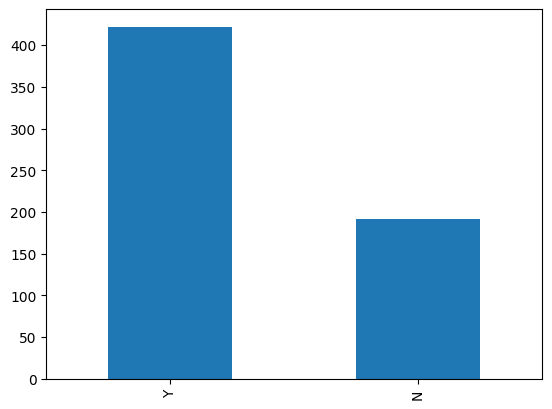

In [201]:
train['Loan_Status'].value_counts().plot.bar()

Conclusion of that plot:


*   The loan around 69% (422 out of 614) applicants was approved



Visualize each variable

Categorical features : These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features : Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical Features : These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

###Independent Variable (Categorial)

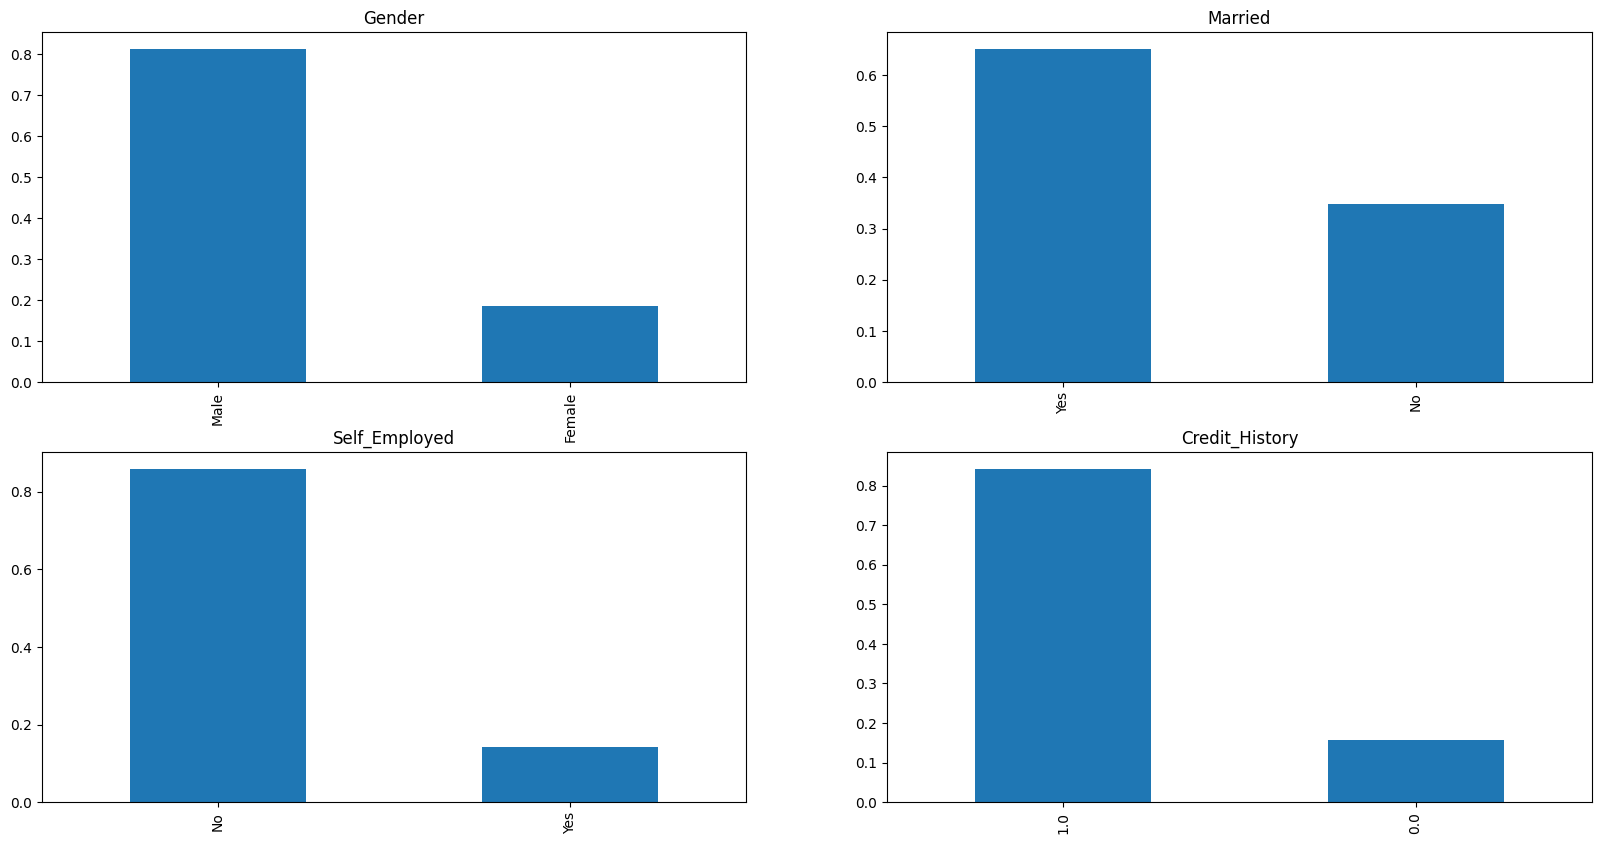

In [202]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Gender")

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Self_Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Credit_History")

plt.show()

Conclusion of that plot:
*   80% applicants are male
*   Around 65% applicants are married
*   Around 15% applicants are self employed
*   Around 85% applicants have repaid their debts



###Independent Variable (Ordinal)

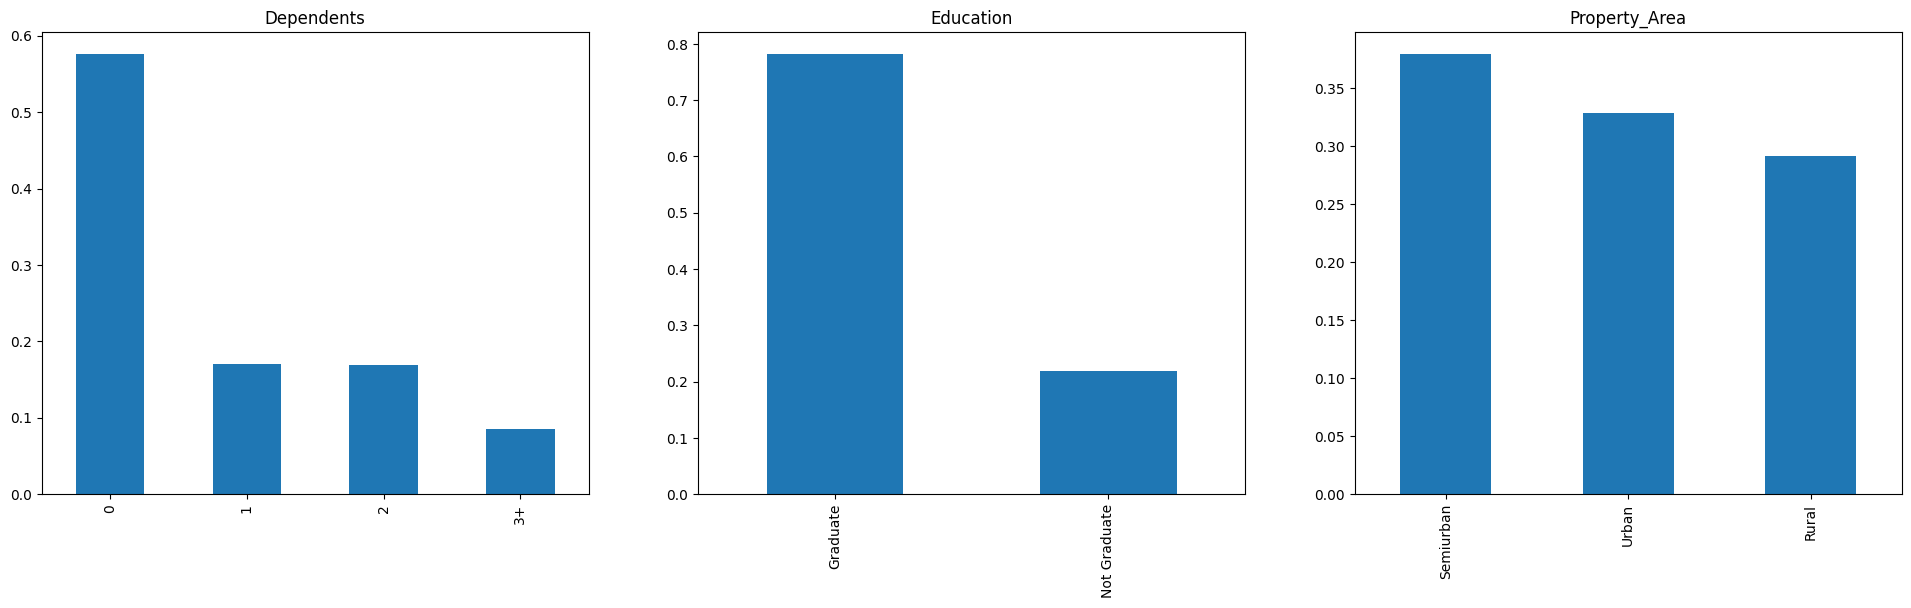

In [203]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Property_Area')
plt.show()

Conclusion of that plot:
*   Most of the applicants don't have any dependents
*   Around 80% applicants are Graduate
*   Most of the applicants are from Semiurban area



###Independent Variable (Numerical)

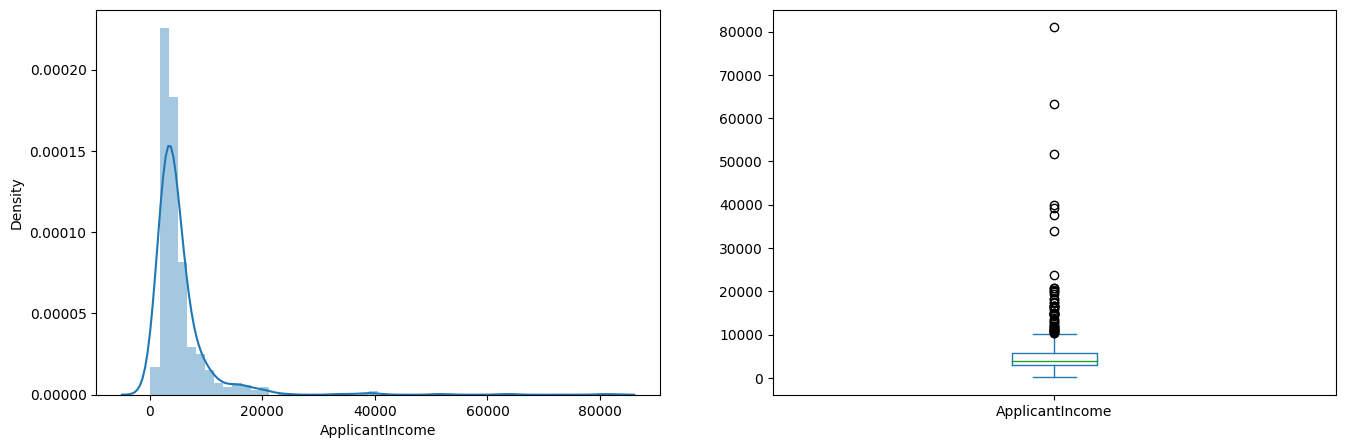

In [204]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

From distplot, we can see that the distribution of applicant income is towards left which means it is not normally distributed. So we need to make it normal.

The boxplot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

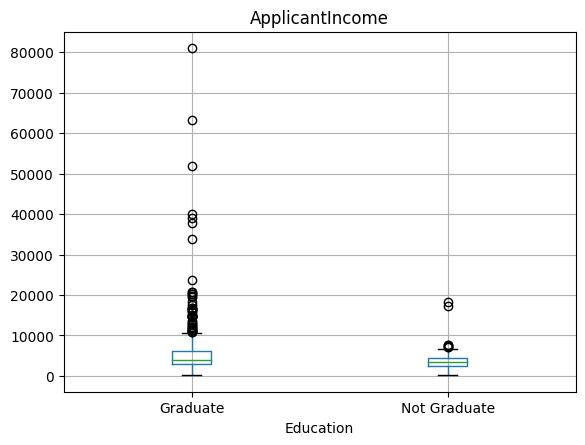

In [205]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle('')

A higher number of graduates with very high incomes, which are appearing to be the outliers

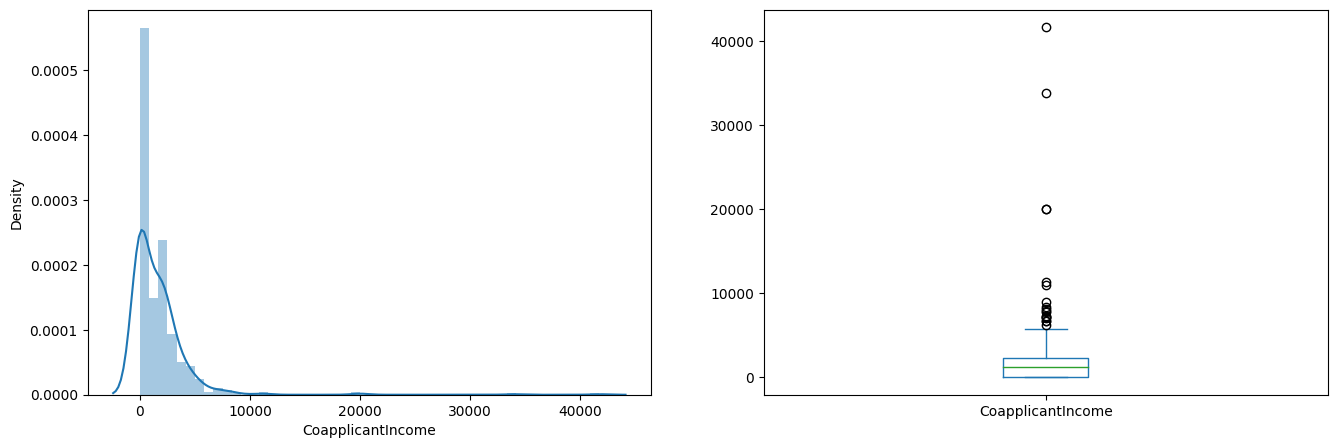

In [206]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

We can see a similar distribution as that of the applicant income and it is not normally distributed. We also see a alot of outliers.

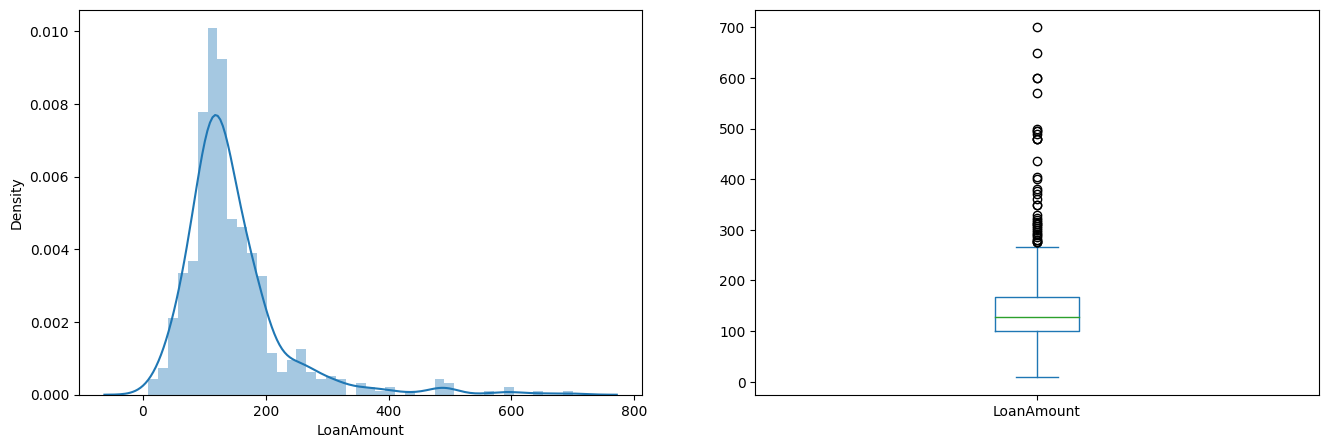

In [207]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

We can see that the distribution is fairly normal and we see a lot of outliers.

##Bivariate Analysis

###Categorical Independent Variable vs Target Variable

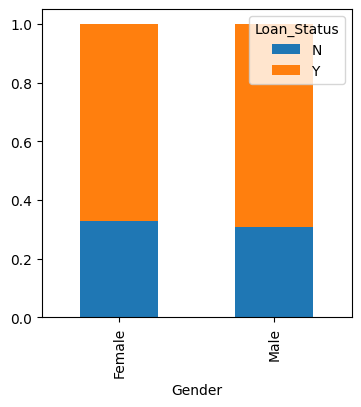

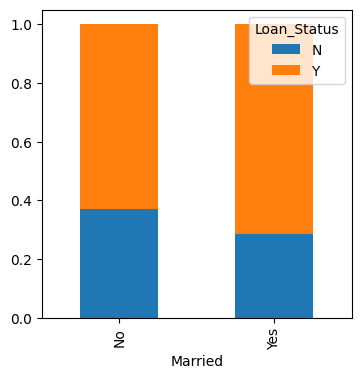

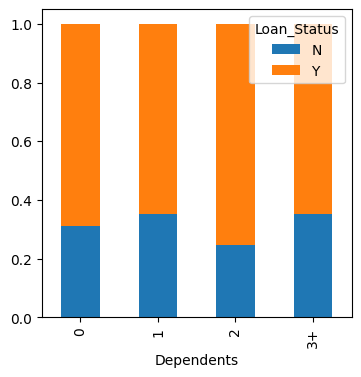

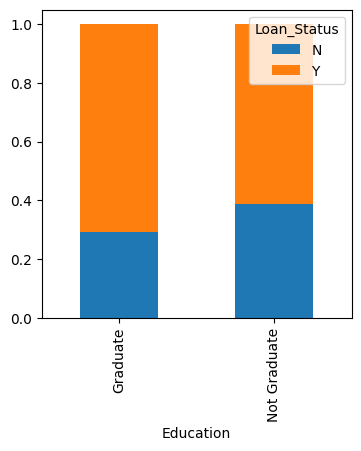

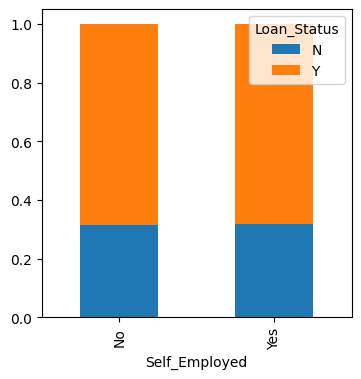

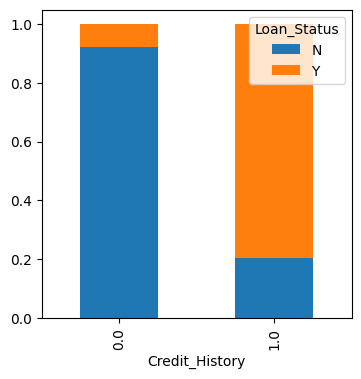

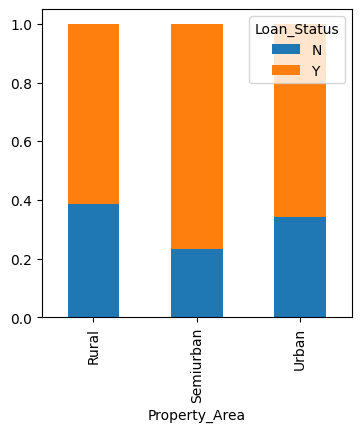

In [208]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True, figsize = (4,4))

plt.show()

* The proportion of male and female applicants is same for both approved and unapproved loans
* Proportion of married applicants is higher for the approved loans
* Distribution of applicants with 1 or 3+ dependents is similar accross both the categories of Loan_Status
* Proportion of graduate applicants is higher for the approved loans
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot
* It seems people with credit history 1 are more likely to get their loans approved
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

###Numerical Independent Variable vs Target Variable

Find the mean indome of people for which the moal has been approved vs not been approved

<Axes: xlabel='Loan_Status'>

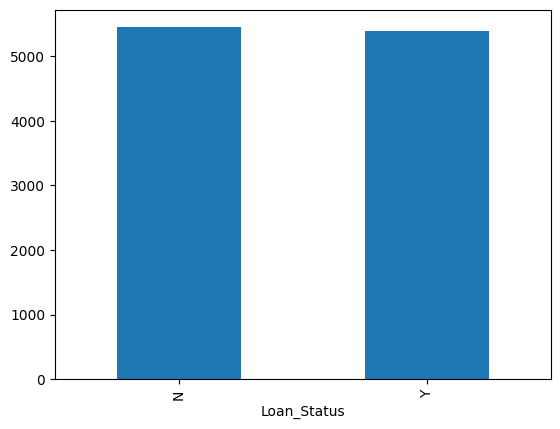

In [209]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don't see any change in the mean income, so let's make bins for the applicant income variable based in the values in it and analyze the corresponding loan status for each bin

Text(0, 0.5, 'Percentage')

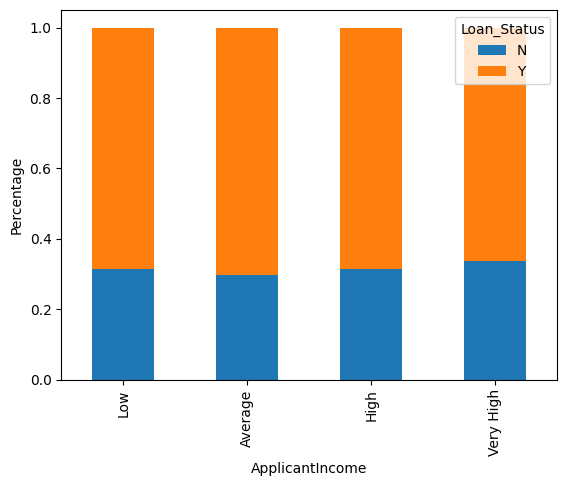

In [210]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

ApplicantIncome does not affect the chances of loan approval.

We will analyze the coapplicant income and loan amount variable

Text(0, 0.5, 'Percentage')

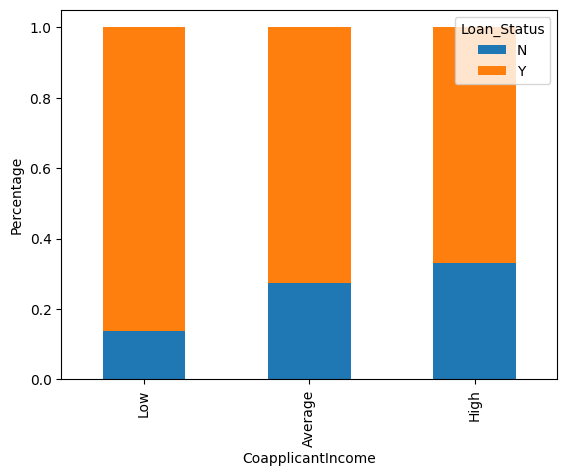

In [211]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant's income is less, the chances of loan approval are high. But this does not look right. Let combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status

Text(0, 0.5, 'Percentage')

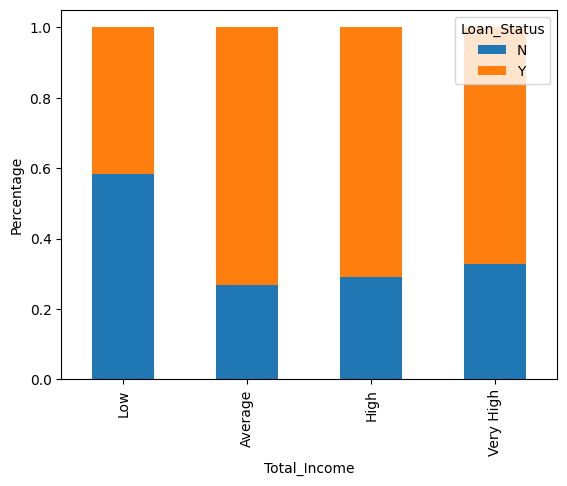

In [212]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel("Total_Income")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

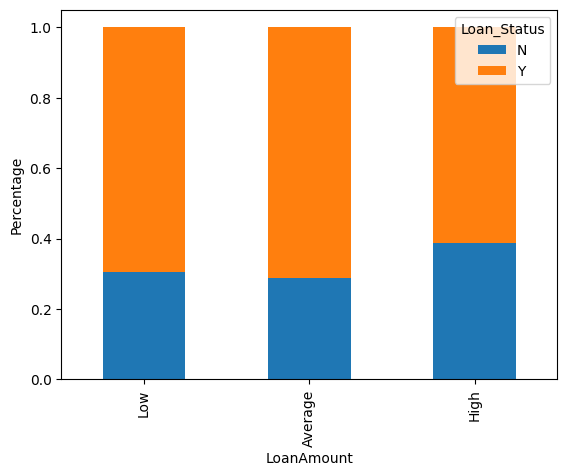

In [213]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

The plot shows that the proportion of approved loans is higher for Low and Average Loan Amount.

###Correlation of the features

* Drop the bins
* Change the 3+ in dependents variable to 3 to make it numerical variable
* convert the target variable's vategories into 0 and 1. Replace N with 0 and Y with 1

In [214]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis = 1)

In [215]:
train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

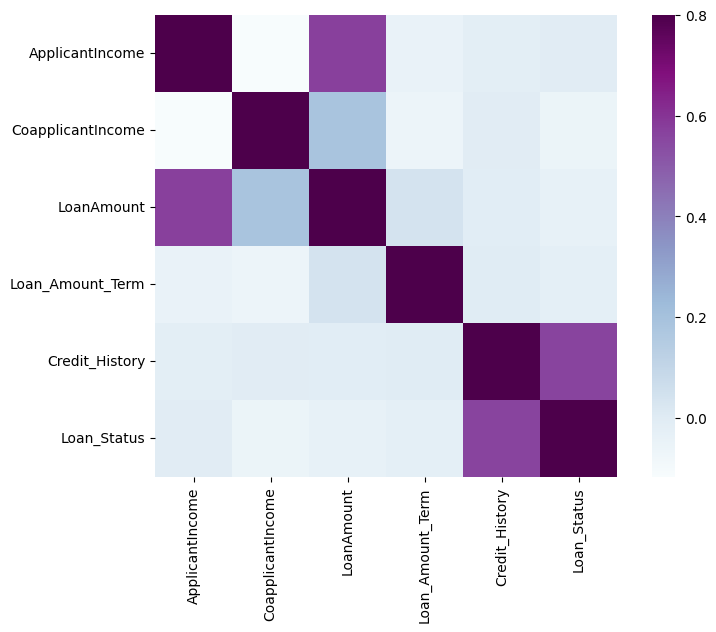

In [216]:
plt.figure(figsize = (9,6))
sns.heatmap(train.corr(), vmax = .8, square = True, cmap = 'BuPu')
plt.show()

From that heatmap we can see that the most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is alsi correlated with CoapplicantIncome

#Preprocessing

## Missing Value Treatment

In [217]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Fill the missing values with:
* Mean/Median : for numerical variables
* Mode : for categorical variables

In [218]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [219]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

For LoanAmount variable, we use median to fill the missing value because the LoanAmount variable not normalize distributed.

In [220]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [221]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

For test dataset

In [222]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [223]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

In [224]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)

In [225]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

##Outlier Treatment

We can use log transformation for Loan_Amount variable to reduces the larger values so we get a distribution similar to normal disribution

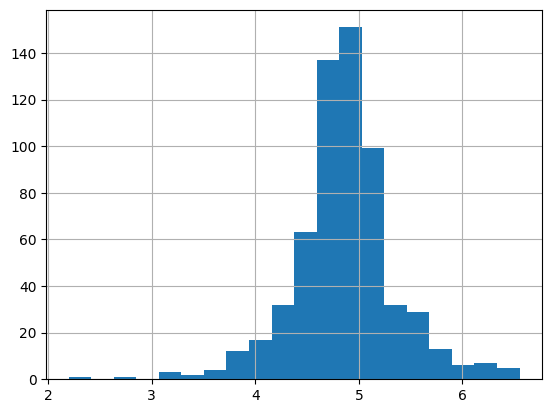

In [226]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

#Modelling

In [227]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [228]:
y = train.Loan_Status
X = train.drop('Loan_Status', 1)

In [229]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


##Encode the categorical variable

In [230]:
from sklearn.preprocessing import LabelEncoder
X_ori = X.copy()
encoder = LabelEncoder()
categorical_data = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_data:
  X[column] = encoder.fit_transform(X[column])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760


##Train test split data for make model

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##Build logistic regression model

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
from sklearn.metrics import accuracy_score

In [235]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [236]:
y_pred = model.predict(X_test)

In [237]:
accuracy_score(y_test, y_pred)

0.8

###Prediction using logistic regression for test dataset

In [238]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [239]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [240]:
from sklearn.preprocessing import LabelEncoder
test_ori = test.copy()
encoder = LabelEncoder()
categorical_data = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_data:
  test[column] = encoder.fit_transform(test[column])
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709


In [241]:
test_predict = model.predict(test)

In [242]:
test['Loan_Status'] = test_predict
test['Loan_ID'] = df_test['Loan_ID']

In [243]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_Status,Loan_ID
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,1,LP001015
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,1,LP001022
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,1,LP001031
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,1,LP001035
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,1,LP001051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,4.727388,1,LP002971
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,4.744932,1,LP002975
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,4.836282,1,LP002980
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,5.062595,1,LP002986


In [244]:
test['Loan_Status'].replace(0, 'N', inplace = True)
test['Loan_Status'].replace(1, 'Y', inplace = True)

### Format of result of logistic Regression

In [245]:
df_sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [246]:
final = pd.DataFrame(test, columns = ['Loan_ID', 'Loan_Status'])

In [247]:
final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


##Modelling using stratified k-folds cross validation

In [248]:
from sklearn.model_selection import StratifiedKFold

In [252]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index, in kf.split(X,y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.iloc[train_index], X.iloc[test_index]
  ytr, yvl = y.iloc[train_index], y.iloc[test_index]
  model = LogisticRegression(random_state = 1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy score = ', score)
  i = i+1


1 of kfold 5
accuracy score =  0.8048780487804879

2 of kfold 5
accuracy score =  0.7642276422764228

3 of kfold 5
accuracy score =  0.7804878048780488

4 of kfold 5
accuracy score =  0.8211382113821138

5 of kfold 5
accuracy score =  0.7950819672131147


#Feature Engineering (Attachment)

<Axes: xlabel='Total_Income', ylabel='Density'>

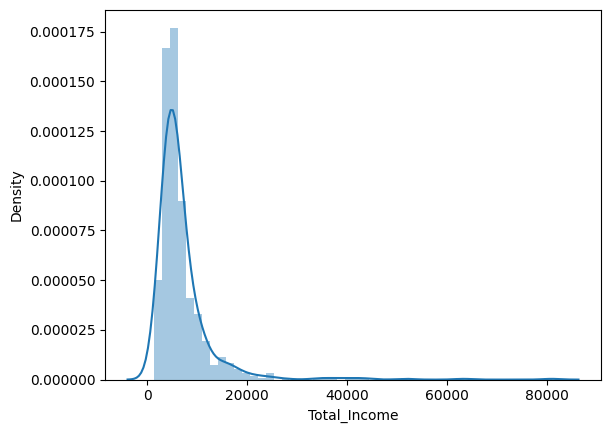

In [255]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + train['CoapplicantIncome']
sns.distplot(train['Total_Income'])

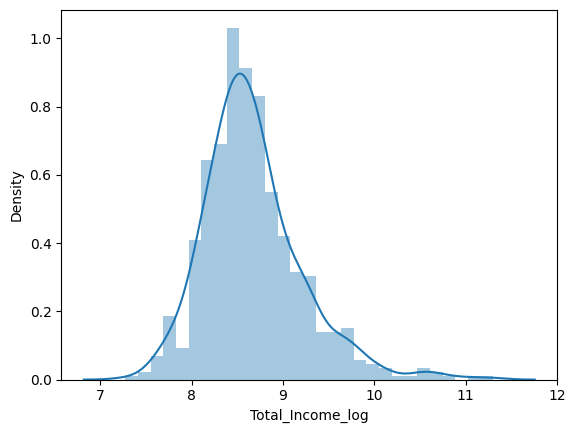

In [256]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

<Axes: xlabel='EMI', ylabel='Density'>

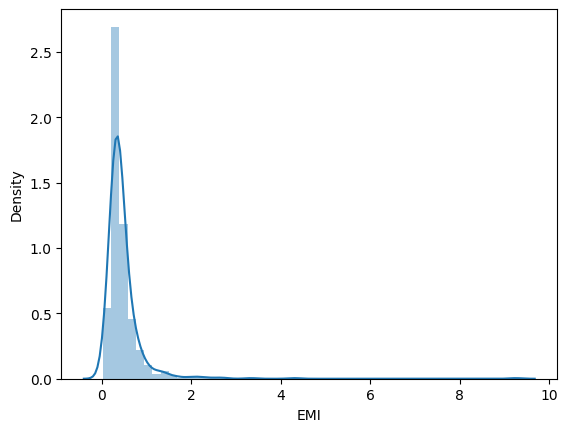

In [257]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

<Axes: xlabel='Balance_Income', ylabel='Density'>

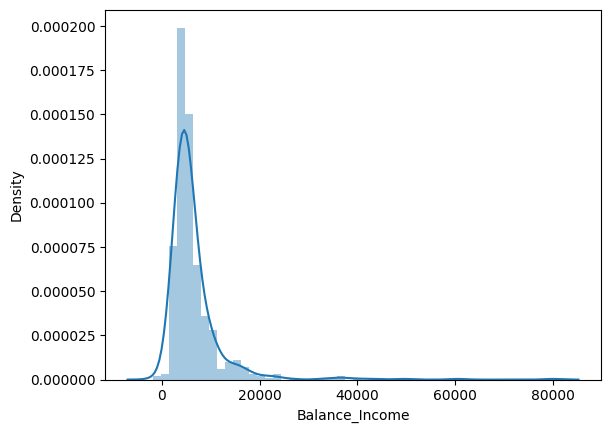

In [258]:
train['Balance_Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance_Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [259]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
